In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
training = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/train.csv')
testing = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/test.csv')

In [3]:
print(training.shape)
print(testing.shape)

(200000, 202)
(200000, 201)


In [4]:
training

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
0       -9.2834  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910   
1        7.0433  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516   
2       -9.0837  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858   
3       -1.8361  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214   
4        2.4486  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942   
...         ...     ...      ...  ...      ...      ...      ...      ...   
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
0       18.5227  -2.3978   7.8784   8.5635  12.7803  -1.0914  
1       15.4305   2.0339   8.1267   8.7889  18.3560   1.9518  
2       21.6042   3.1417  -6.5213   8.2675  14.7222   0.3965  
3       23.0347  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       13.2876  -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...      ...  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 202 columns]

In [5]:
df = training.drop(['ID_code', 'target'], axis=1)
features = df.columns
target_trn = training['target']


In [6]:
target_trn.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [7]:
target_trn.value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [8]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [9]:
summary_train = df.describe().T
scroll_summary_train = create_scrollable_table(summary_train, 'summary_train', 'Statistical summary (Training)')
display(HTML(scroll_summary_train))

In [10]:
summary_test = testing.describe().T
scroll_summary_test = create_scrollable_table(summary_test, 'summary_test', 'Statistical summary (Testing)')
display(HTML(scroll_summary_test))

We can make few observations here:

- standard deviation is relatively large for both train and test variable data;
- min, max, mean, sdt values for train and test data looks quite close;
- mean values are distributed over a large range.
- The number of values in train and test set is the same.

In [11]:
def show_bar_perc(ax):
    for plot in ax.containers:
        labels = []
        for bar in plot:
            labels.append(f'{bar.get_height():.0f}%')
        ax.bar_label(plot, labels=labels, label_type='edge')

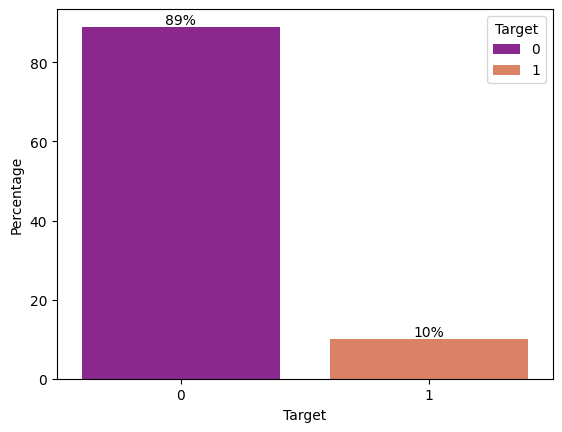

In [12]:
fig, ax1 = plt.subplots()

percentage = (target_trn.value_counts(normalize=True) * 100).astype(int)
perc_df = pd.DataFrame(data={'Target': [0, 1], 'Percentage': percentage})

perc_plot = sns.barplot(data= perc_df, x='Target', y='Percentage', hue=perc_df['Target'], palette='plasma', ax=ax1)
show_bar_perc(ax1)

In [13]:
def check_null(df):
    total = df.isnull().sum()
    perc_null = df.isnull().sum() / len(df) * 100
    null_df = pd.DataFrame(data={'Total': total, 'Percent': perc_null})

    types = []
    for col in df.columns:
        types.append(str(df[col].dtype))
    null_df['Types'] = types

    return null_df

In [14]:
null_count = check_null(training)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (training dataset)')
display(HTML(scroll_null_count))

In [15]:
null_count = check_null(testing)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (testing dataset)')
display(HTML(scroll_null_count))

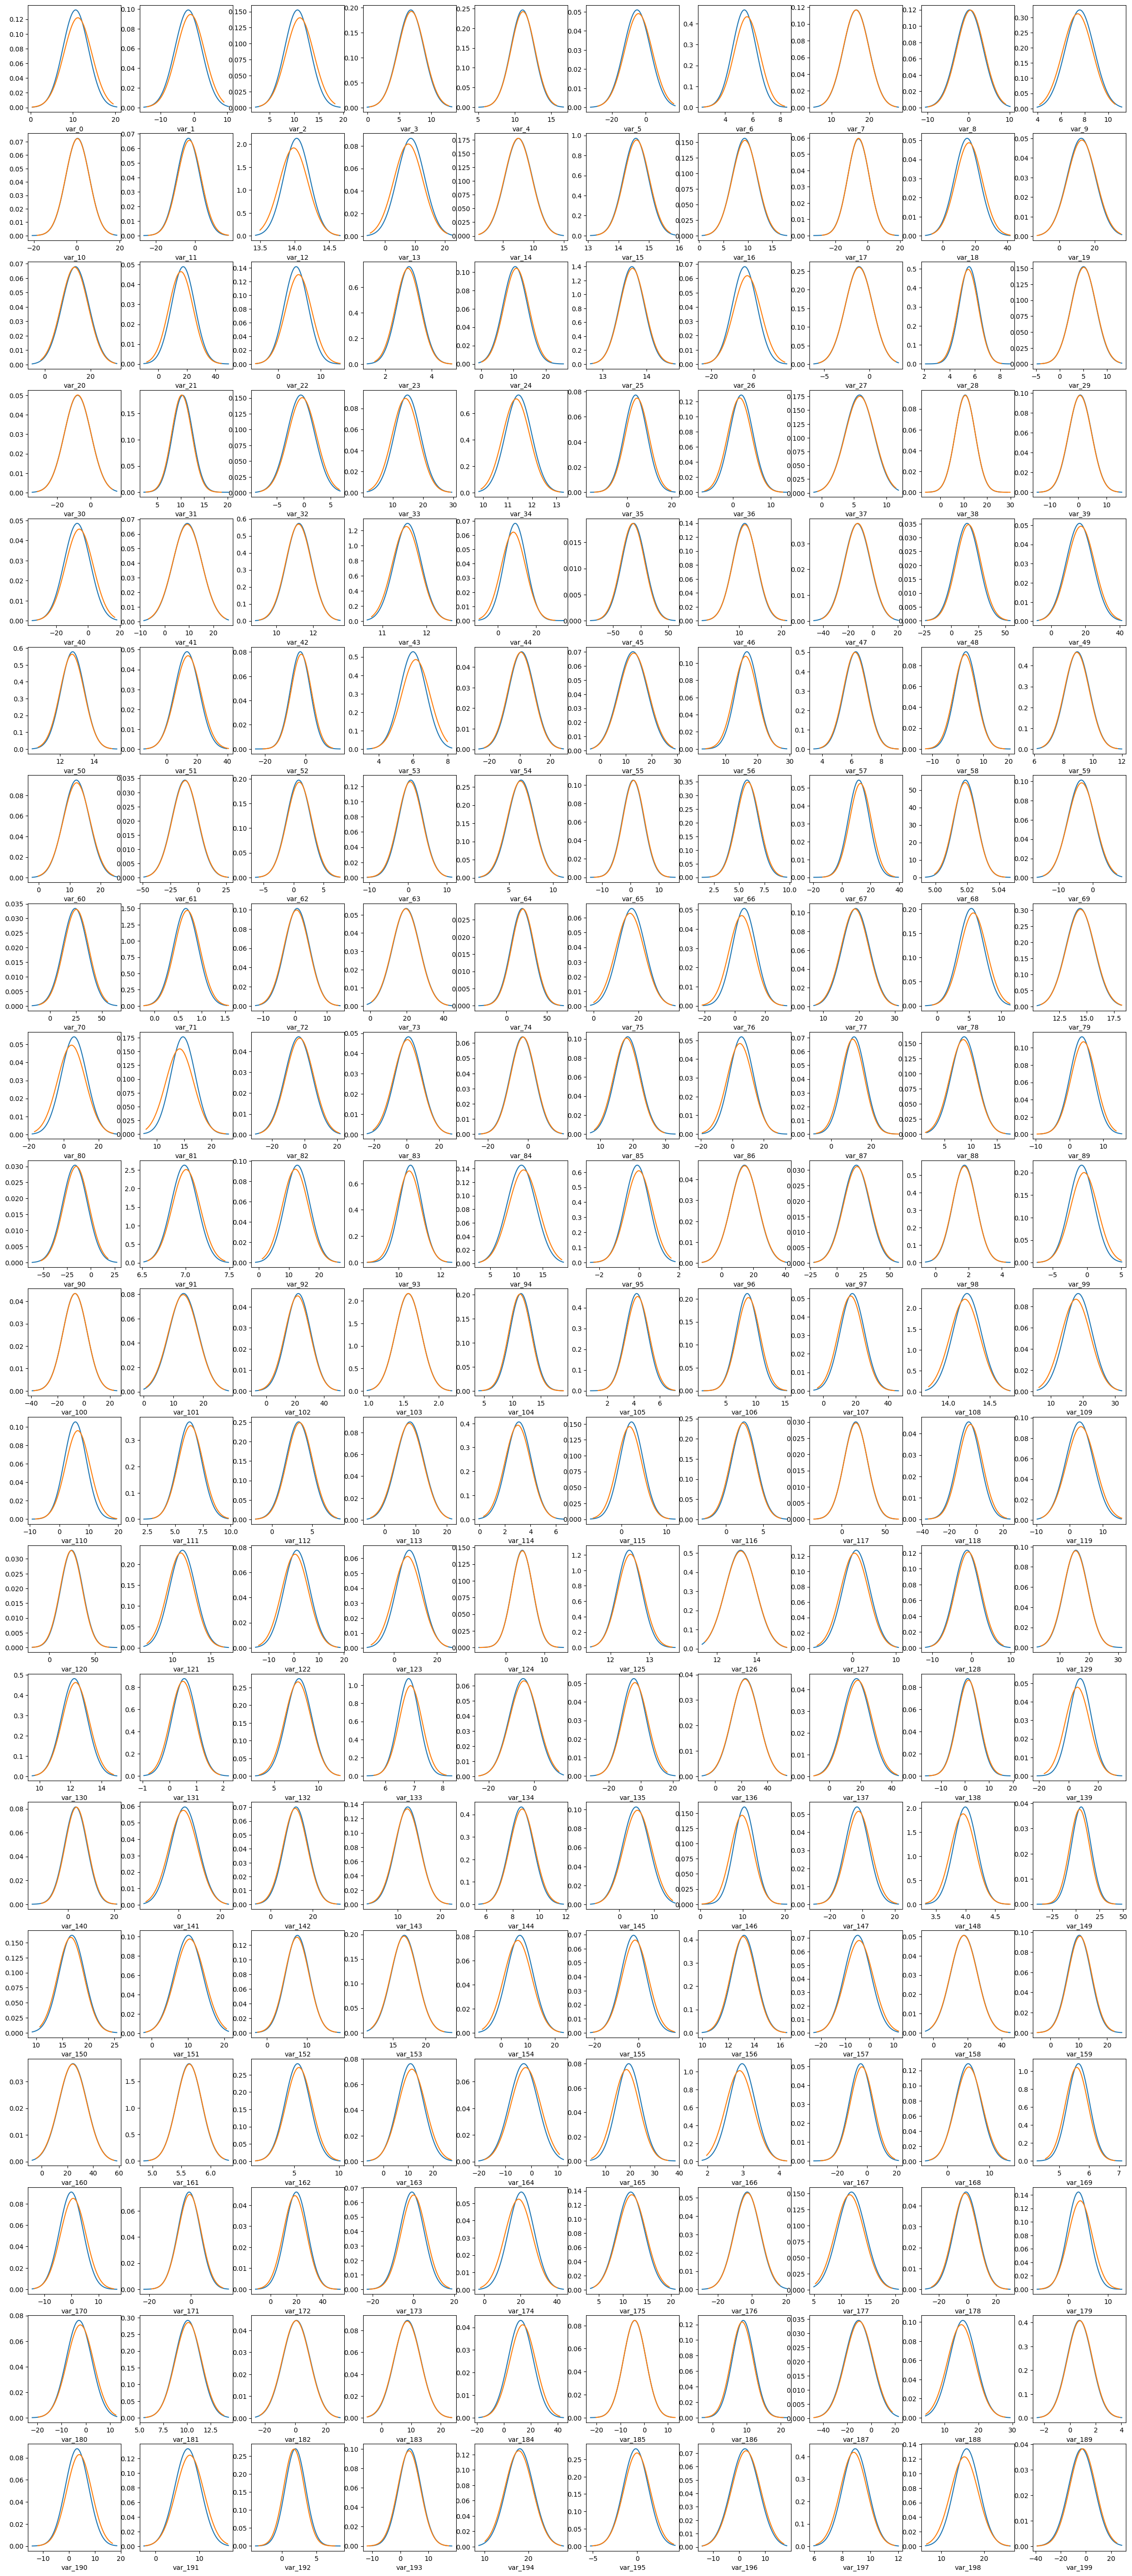

In [16]:
#Check distribution of each variable for "transaction" and "non-transaction" targets:

import scipy.stats as stats
df = training.drop(['ID_code', 'target'], axis=1)
df_0 = training[training['target']==0]
df_1 = training[training['target']==1]

i = 0
fig, ax = plt.subplots(20, 10, figsize=(30,70))

for col in features:
    i += 1
    plt.subplot(20, 10, i)

    x_line = np.linspace(df_0[col].min(), df_0[col].max(), 100)
    mu, sigma = stats.norm.fit(df_0[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var0_line = sns.lineplot(x=x_line, y=y_line)                    # Blue: Target 0

    x_line = np.linspace(df_1[col].min(), df_1[col].max(), 100)
    mu, sigma = stats.norm.fit(df_1[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var1_line = sns.lineplot(x=x_line, y=y_line)                    # Orange: Target 1

    plt.xlabel(col)

plt.show()

# Variables with similar distribution between "non-transaction" and "transaction":
# ['var_3', 'var_4', 'var_7', 'var_10', 'var_14', 'var_17', 'var_27', 'var_29', 'var_30', 'var_38', 'var_39', 'var_41', 'var_42', 'var_46', 'var_47', 'var_59', 'var_61', 'var_65', 'var_73', 'var_79', 'var_96', 'var_98', 'var_100', 'var_103', 'var_117', 'var_120', 'var_124', 'var_126', 'var_129', 'var_136', 'var_158', 'var_160', 'var_161', 'var_182', 'var_183', 'var_185', 'var_189']


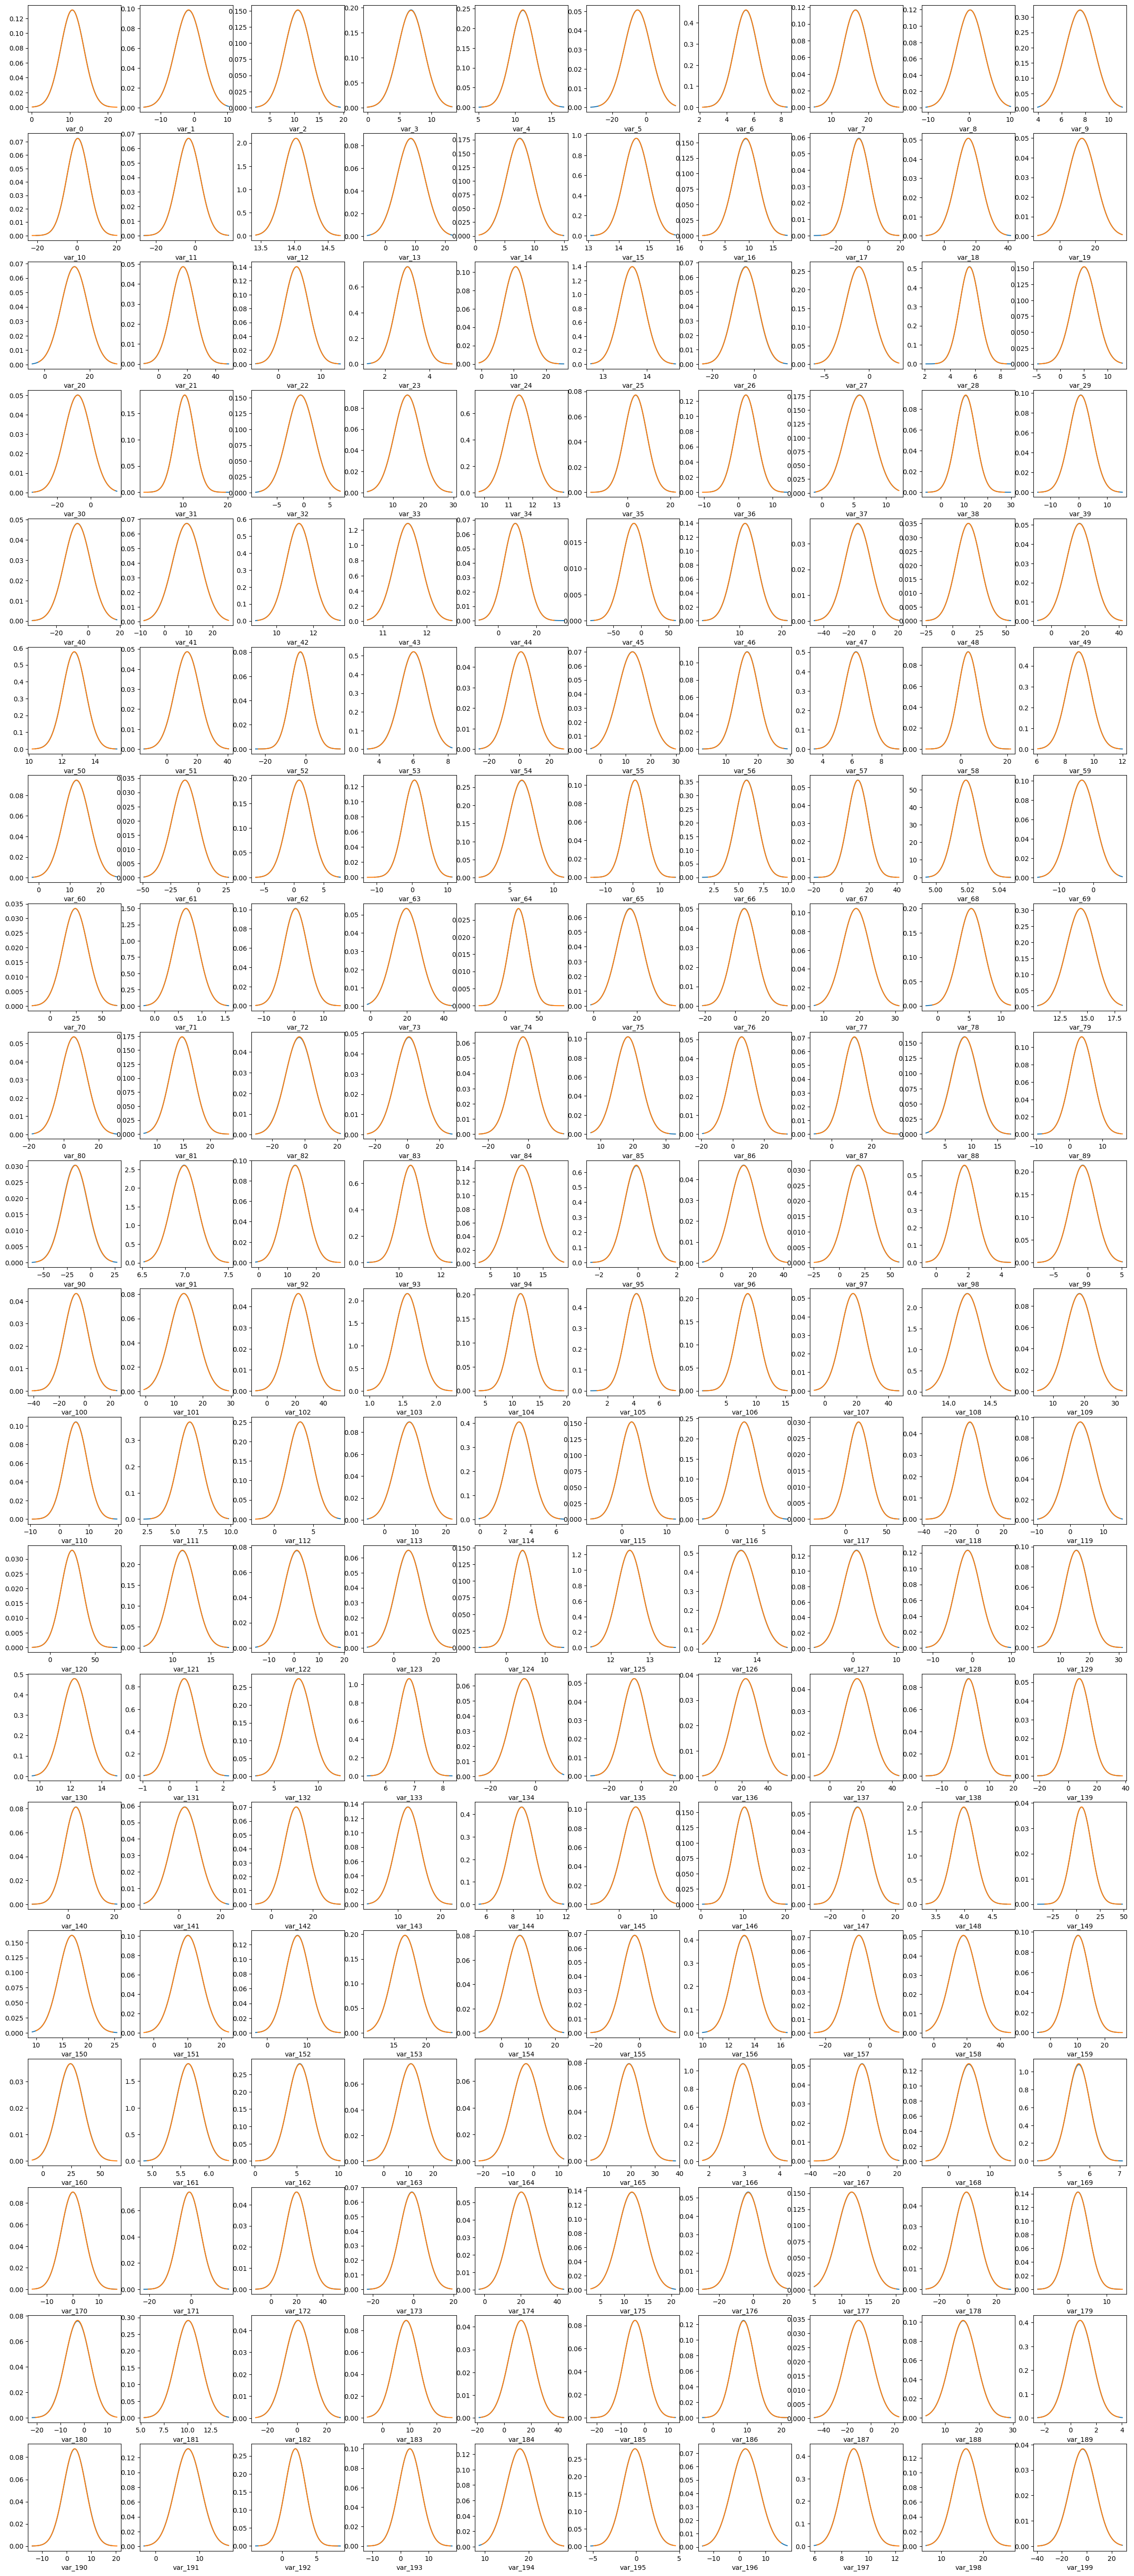

In [17]:
#Check distribution of each variable for "training" and "testing" datasets:

i = 0
fig, ax = plt.subplots(20, 10, figsize=(30,70))

for col in features:
    i += 1
    plt.subplot(20, 10, i)

    x_line = np.linspace(training[col].min(), training[col].max(), 100)
    mu, sigma = stats.norm.fit(training[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    train_plot = sns.lineplot(x=x_line, y=y_line)

    x_line = np.linspace(testing[col].min(), testing[col].max(), 100)
    mu, sigma = stats.norm.fit(testing[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    train_plot = sns.lineplot(x=x_line, y=y_line)

    plt.xlabel(col)

plt.show()

# Variables with different distribution between "training" and "testing" sets:
# [None]

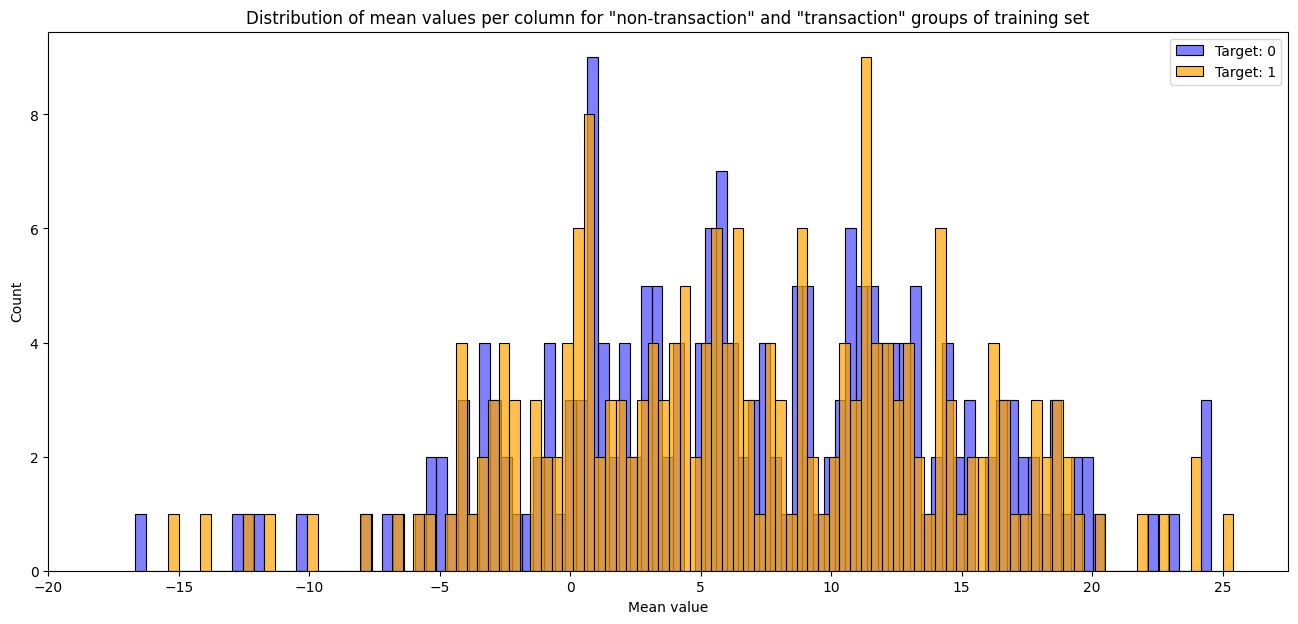

In [18]:
fig, ax = plt.subplots(figsize=(16,7))
var0_hist = sns.histplot(df_0[features].mean(), bins=100, color='blue', label='Target: 0', alpha=0.5, ax=ax)
var1_hist = sns.histplot(df_1[features].mean(), bins=100, color='orange', label='Target: 1', alpha=0.7, ax=ax)

ax.set_title('Distribution of mean values per column for "non-transaction" and "transaction" groups of training set')
ax.set_xlabel('Mean value')

plt.xticks(np.arange(-20, 30, 5))
plt.legend()

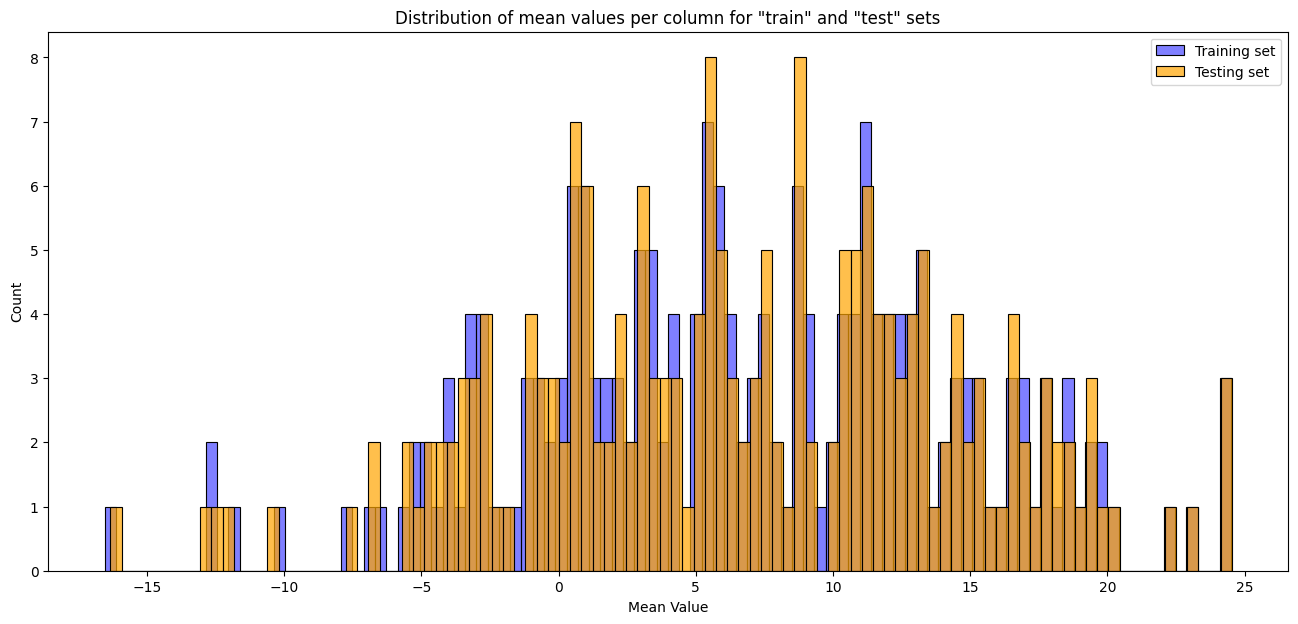

In [19]:
fig, ax = plt.subplots(figsize=(16,7))

train_hist = sns.histplot(training[features].mean(), bins=100, color='blue', label='Training set', alpha=0.5, ax=ax)
test_hist = sns.histplot(testing[features].mean(), bins=100, color='orange', label='Testing set', alpha=0.7, ax=ax)

ax.set_title('Distribution of mean values per column for "train" and "test" sets')
ax.set_xlabel('Mean Value')

plt.xticks(np.arange(-15, 30, 5))
plt.legend()
plt.show()

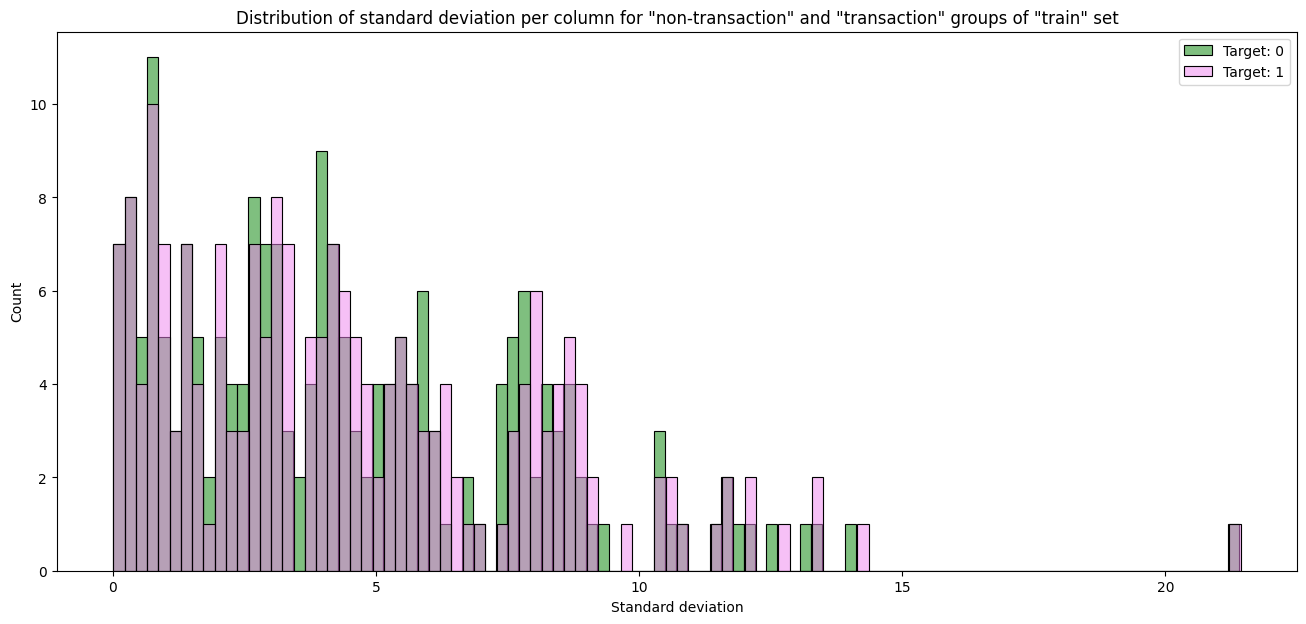

In [20]:
fig, ax = plt.subplots(figsize=(16,7))

var0_std_hist = sns.histplot(df_0[features].std(), bins=100, color='green', label='Target: 0', alpha=0.5, ax=ax)
var1_std_hist = sns.histplot(df_1[features].std(), bins=100, color='violet', label='Target: 1', alpha=0.5, ax=ax)

ax.set_title('Distribution of standard deviation per column for "non-transaction" and "transaction" groups of "train" set')
ax.set_xlabel('Standard deviation')

plt.legend()
plt.show()

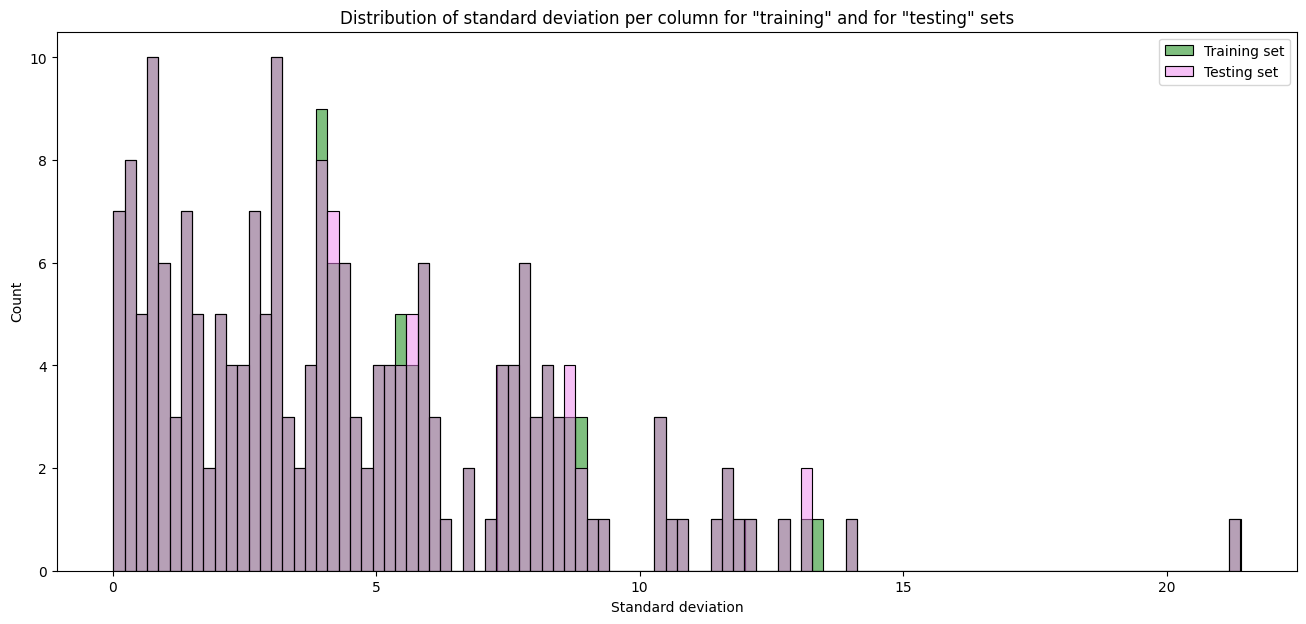

In [21]:
fig, ax = plt.subplots(figsize=(16,7))

train_std_hist = sns.histplot(training[features].std(), bins=100, color='green', label='Training set', alpha=0.5, ax=ax)
test_std_hist = sns.histplot(testing[features].std(), bins=100, color='violet', label='Testing set', alpha=0.5, ax=ax)

ax.set_title('Distribution of standard deviation per column for "training" and for "testing" sets')
ax.set_xlabel('Standard deviation')

plt.legend()
plt.show()

In [22]:
correlations = df.corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

In [23]:
print("Most correlated couples: ")
print(correlations.tail(10), "\n")

print("Least correlated couples: ")
print(correlations.head(10))

# correlation between features is very small

Most correlated couples: 
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844 

Least correlated couples: 
   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07


<Axes: >

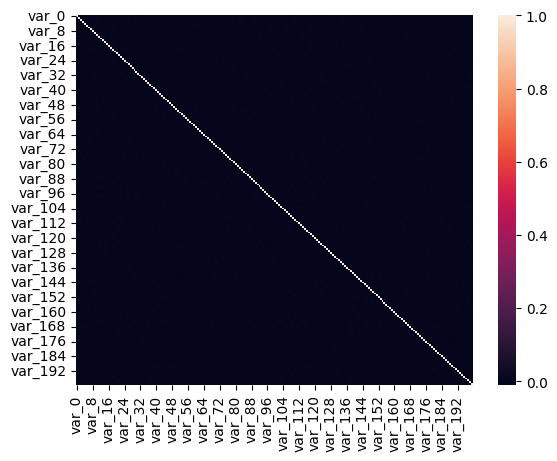

In [24]:
sns.heatmap(df.corr())

In [25]:
df.corr().abs().unstack()

var_0    var_0      1.000000
         var_1      0.000544
         var_2      0.006573
         var_3      0.003801
         var_4      0.001326
                      ...   
var_199  var_195    0.002042
         var_196    0.000607
         var_197    0.004991
         var_198    0.004731
         var_199    1.000000
Length: 40000, dtype: float64

In [26]:
df.corr().abs()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000  0.000544  0.006573  0.003801  0.001326  0.003046  0.006983   
var_1    0.000544  1.000000  0.003980  0.000010  0.000303  0.000902  0.003258   
var_2    0.006573  0.003980  1.000000  0.001001  0.000723  0.001569  0.000883   
var_3    0.003801  0.000010  0.001001  1.000000  0.000322  0.003253  0.000774   
var_4    0.001326  0.000303  0.000723  0.000322  1.000000  0.001368  0.000049   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.002073  0.000785  0.001070  0.001206  0.003706  0.001274  0.001244   
var_196  0.004386  0.000377  0.003952  0.002800  0.000513  0.002880  0.005378   
var_197  0.000753  0.004157  0.001078  0.001164  0.000046  0.000535  0.003565   
var_198  0.005776  0.004861  0.000877  0.001651  0.001821  0.000953  0.003025   
var_199  0.003850  0.002287  0.003855  0.000506  0.000786  0.002767  0.006096   

            var_7     var_8     var_9  ...   var_190   var_191   var_192  \
var_0    0.002429  0.004962  0.002613  ...  0.002752  0.000206  0.005373   
var_1    0.001511  0.004098  0.000832  ...  0.006627  0.003621  0.002604   
var_2    0.000991  0.002648  0.001932  ...  0.000197  0.001285  0.003400   
var_3    0.002500  0.003553  0.000826  ...  0.000151  0.002445  0.001530   
var_4    0.004549  0.001194  0.000918  ...  0.001514  0.004357  0.003347   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.001854  0.001396  0.000868  ...  0.004571  0.000870  0.004745   
var_196  0.001045  0.003242  0.000052  ...  0.000847  0.002466  0.001386   
var_197  0.003466  0.004583  0.003701  ...  0.004974  0.000906  0.000527   
var_198  0.000650  0.002950  0.002343  ...  0.000153  0.000067  0.003451   
var_199  0.001457  0.000854  0.001070  ...  0.000404  0.003595  0.001239   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
var_0    0.001616  0.001514  0.002073  0.004386  0.000753  0.005776  0.003850  
var_1    0.001153  0.002557  0.000785  0.000377  0.004157  0.004861  0.002287  
var_2    0.000549  0.002104  0.001070  0.003952  0.001078  0.000877  0.003855  
var_3    0.001699  0.001054  0.001206  0.002800  0.001164  0.001651  0.000506  
var_4    0.000813  0.000068  0.003706  0.000513  0.000046  0.001821  0.000786  
...           ...       ...       ...       ...       ...       ...       ...  
var_195  0.003143  0.001201  1.000000  0.002517  0.004170  0.000536  0.002042  
var_196  0.005308  0.005040  0.002517  1.000000  0.000454  0.000253  0.000607  
var_197  0.005068  0.000884  0.004170  0.000454  1.000000  0.001183  0.004991  
var_198  0.001646  0.003194  0.000536  0.000253  0.001183  1.000000  0.004731  
var_199  0.000552  0.005615  0.002042  0.000607  0.004991  0.004731  1.000000  

[200 rows x 200 columns]

In [27]:
unique_max_train = []
unique_max_test = []

for col in features:
    train_count = training[col].value_counts()
    unique_max_train.append([col, train_count.max(), train_count.idxmax()])

    test_count = testing[col].value_counts()
    unique_max_test.append([col, test_count.max(), test_count.idxmax()])

unique_max_train_df = pd.DataFrame(data=unique_max_train, columns=['Variable', 'Max duplicate times', 'Max duplicate value']).sort_values(by='Max duplicate times', ascending=False)
scroll_unique_max_train = create_scrollable_table(unique_max_train_df, 'unique_max_train', 'Duplicate values (training)')
display(HTML(scroll_unique_max_train))


In [28]:
unique_max_test_df = pd.DataFrame(data=unique_max_test, columns=['Variable', 'Max duplicate times', 'Max duplicate value']).sort_values(by='Max duplicate times', ascending=False)
scroll_unique_max_test = create_scrollable_table(unique_max_test_df, 'unique_max_test', 'Duplicate values (testing)')
display(HTML(scroll_unique_max_test))

- Interestingly, similar variables appear in both table, suggesting fake data.

In [37]:
#FEATURE ENGINEERING:

for ds in [training, testing]:
    ds['sum'] = ds[features].sum(axis=1)
    ds['min'] = ds[features].min(axis=1)
    ds['max'] = ds[features].max(axis=1)
    ds['mean'] = ds[features].mean(axis=1)
    ds['std'] = ds[features].std(axis=1)
    ds['skew'] = ds[features].skew(axis=1)
    ds['kurt'] = ds[features].kurtosis(axis=1)
    ds['med'] = ds[features].median(axis=1)

In [42]:
#MODEL BUILDING:

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boost': 'gbdt',
    'boost_from_average': 'false',
    'num_leaves': 20,
    'feature_fraction': 0.05,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'learning_rate': 0.01,
    'max_depth': 10,
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_threads': 8,
    'tree_learner': 'serial',
    'verbosity': 1
}

n_fold = 10
num_round = 10000

cv = StratifiedKFold(n_splits=n_fold, shuffle=False)
oof = np.zeros(len(training))
predictions = np.zeros(len(testing))

for fold_, (X_train_idx, X_test_idx) in enumerate(cv.split(df.values, target_trn.values)):
    print(f'KFold: {fold_+1}')
    X_train = df.iloc[X_train_idx]
    X_test = df.iloc[X_test_idx]
    y_train = target_trn.iloc[X_train_idx]
    y_test = target_trn.iloc[X_test_idx]

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    clf = lgb.train(params, train_data, num_round, valid_sets=test_data)
    oof[X_test_idx] = clf.predict(X_test, num_iteration=clf.best_iteration)

    predictions += clf.predict(testing[features], num_iteration=clf.best_iteration) / cv.n_splits

print(f'CV Score: {(roc_auc_score(target_trn, oof)):<8.5f}')


KFold: 1
[LightGBM] [Info] Number of positive: 18089, number of negative: 161911
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 200
KFold: 2
[LightGBM] [Info] Number of positive: 18089, number of negative: 161911
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 200
KFold: 3
[LightGBM] [Info] Number of positive: 18088, number of negative: 161912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] 

In [30]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

params = {
    'objective': 'binary'
}

n_fold = 5
num_round = 5000

cv=StratifiedKFold(n_splits=n_fold, shuffle=False)
oof = np.zeros(len(training))
predictions = np.zeros(len(testing))

for fold_, (X_train_idx, X_test_idx) in enumerate(cv.split(df.values, target_trn.values)):
    print(f'Fold: {fold_+1}')

    X_train = df.iloc[X_train_idx]
    X_test = df.iloc[X_test_idx]
    y_train = target_trn.iloc[X_train_idx]
    y_test = target_trn.iloc[X_test_idx]

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    clf = lgb.train(params, train_data, num_round, valid_sets=test_data)
    oof[X_test_idx] = clf.predict(X_test, num_iteration = clf.best_iteration)

    predictions += clf.predict(testing[features], num_iteration = clf.best_iteration) / cv.n_splits

print(f'CV Score: {(roc_auc_score(target_trn.values, oof)):<8.5f}')


Fold: 1
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100494 -> initscore=-2.191750
[LightGBM] [Info] Start training from score -2.191750


KeyboardInterrupt: 

In [ ]:
#With 'num_leaves': 13, 'max_depth' : -1

#num_round = 10000; 10-Fold                 Score: 0.89840 (Top 57%) (CV Score: 0.89986)        "LightGBM (5).csv"
#num_round = 15000; 10-Fold                                          (CV Score: 0.89975)  
#num_round = 10000; 5-Fold                  Score: 0.89796 (Top 59%) (CV Score: 0.89918)        "LightGBM (4).csv"
#num_round = 15000; 5-Fold                                           (CV Score: 0.89908)
#num_round = 10000; 10-Fold (with #new)                              (CV Score: 0.89879)
#num_round = 20000; 5-Fold                                           (CV Score: 0.89851)       
#num_round = 5000; 10-Fold                  Score: 0.89478 (Top 64%) (CV Score: 0.89713)        "LightGBM (2).csv"
#num_round = 5000;  5-Fold                  Score: 0.89458 (Top 64%) (CV Score: 0.89675)        "LightGBM (3).csv"
#num_round = 25000; 3-Fold                                           (CV Score: 0.89659)       
#num_round = 1000; 10-Fold                  Score: 0.86546 (Top 71%) (CV Score: 0.86970)        "LightGBM (1).csv"

final_result = pd.DataFrame(data = {'ID_code': testing['ID_code'], 'target': predictions})
final_result

In [ ]:
#With 'num_leaves': 20, 'max_depth' : 10

#num_round = 10000; 10-Fold                                          (CV Score: 0.89939)  
